# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
import re
import string
import warnings
warnings.filterwarnings('ignore')

# Functions

In [2]:
def Vsualize(column_name,data):
    
    values = data[column_name].value_counts().values.round(2)
    index = data[column_name].value_counts().index
    
    color = sns.color_palette('RdBu')
    plt.figure(figsize=(9,5))
    # pie chart of column
    plt.subplot(1, 2, 1)
    plt.title(f'Distribution of {column_name}')
    plt.pie(values, labels=index,autopct='%1.1f%%',colors=color)
    
    # Distribution of column
    plt.subplot(1, 2, 2)
    sns.histplot(data[column_name])
    plt.ylabel(f'Number of {column_name}')
    plt.xticks(rotation = 90)
    plt.tight_layout()
    plt.show()

#  Exploratory Data Analysis (EDA) – Fake News Detection

## Read Data

In [3]:
path = '/kaggle/input/unemployment-in-india/Unemployment_Rate_upto_11_2020.csv'
data = pd.read_csv(path)


In [4]:
data.sample(10)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
139,Maharashtra,31-01-2020,M,4.95,42596868,44.19,West,19.7515,75.7139
92,Jammu & Kashmir,31-03-2020,M,15.50,3359107,38.18,North,33.7782,76.5762
130,Madhya Pradesh,29-02-2020,M,4.57,22711479,39.00,West,22.9734,78.6569
47,Delhi,31-08-2020,M,13.79,4850107,35.41,North,28.7041,77.1025
20,Bihar,31-01-2020,M,10.61,26397671,37.72,East,25.0961,85.3131
217,Telangana,31-01-2020,M,5.49,17609295,59.25,South,18.1124,79.0193
193,Rajasthan,31-05-2020,M,15.74,19826602,40.74,North,27.0238,74.2179
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.8550
247,Uttarakhand,31-01-2020,M,5.49,2711639,32.99,North,30.0668,79.0193
250,Uttarakhand,30-04-2020,M,6.48,2720115,33.23,North,30.0668,79.0193


In [5]:
data.shape

(267, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


## Convert Date coloumn from object to datetime format

In [7]:

data['Date'] = pd.to_datetime(data[' Date'])

In [8]:
data.drop(' Date',axis = 1,inplace = True)

In [9]:
data['Date'].head()

0   2020-01-31
1   2020-02-29
2   2020-03-31
3   2020-04-30
4   2020-05-31
Name: Date, dtype: datetime64[ns]

# Check Null Value

In [10]:
data.isnull().sum()

Region                                      0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
Date                                        0
dtype: int64

# Check Duplicated values

In [11]:
data.duplicated().sum()

0

In [12]:
data[['Region','Region.1']]

,Region,Region.1
0,Andhra Pradesh,South
1,Andhra Pradesh,South
2,Andhra Pradesh,South
3,Andhra Pradesh,South
4,Andhra Pradesh,South
...,...,...
262,West Bengal,East
263,West Bengal,East
264,West Bengal,East
265,West Bengal,East


In [13]:
data.nunique()

Region                                       27
 Frequency                                    1
 Estimated Unemployment Rate (%)            252
 Estimated Employed                         267
 Estimated Labour Participation Rate (%)    248
Region.1                                      5
longitude                                    27
latitude                                     24
Date                                         10
dtype: int64

In [14]:
object_data =data.select_dtypes(include = 'object')

In [15]:
object_data

,Region,Frequency,Region.1
0,Andhra Pradesh,M,South
1,Andhra Pradesh,M,South
2,Andhra Pradesh,M,South
3,Andhra Pradesh,M,South
4,Andhra Pradesh,M,South
...,...,...,...
262,West Bengal,M,East
263,West Bengal,M,East
264,West Bengal,M,East
265,West Bengal,M,East


              Region  count
0     Andhra Pradesh     10
1              Assam     10
2              Bihar     10
3       Chhattisgarh     10
4              Delhi     10
5                Goa     10
6            Gujarat     10
7            Haryana     10
8   Himachal Pradesh     10
9          Jharkhand     10
10         Karnataka     10
11         Rajasthan     10
12            Kerala     10
13    Madhya Pradesh     10
14       Maharashtra     10
15         Meghalaya     10
16            Odisha     10
17        Puducherry     10
18            Punjab     10
19       Uttarakhand     10
20        Tamil Nadu     10
21         Telangana     10
22           Tripura     10
23       West Bengal     10
24     Uttar Pradesh     10
25   Jammu & Kashmir      9
26            Sikkim      8


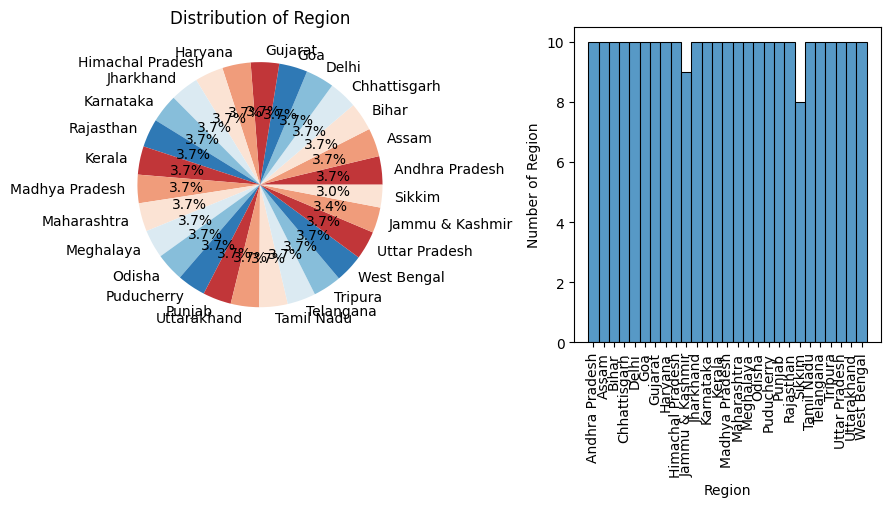

   Frequency  count
0          M    267


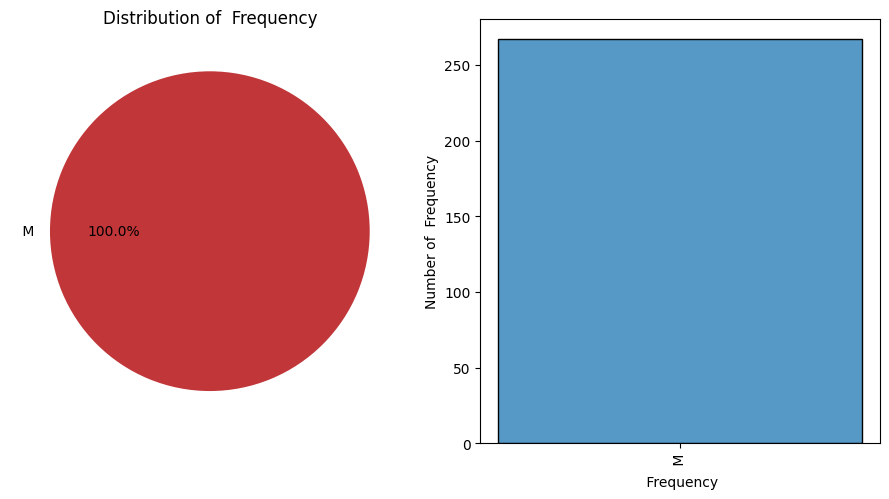

    Region.1  count
0      North     79
1      South     60
2       West     50
3       East     40
4  Northeast     38


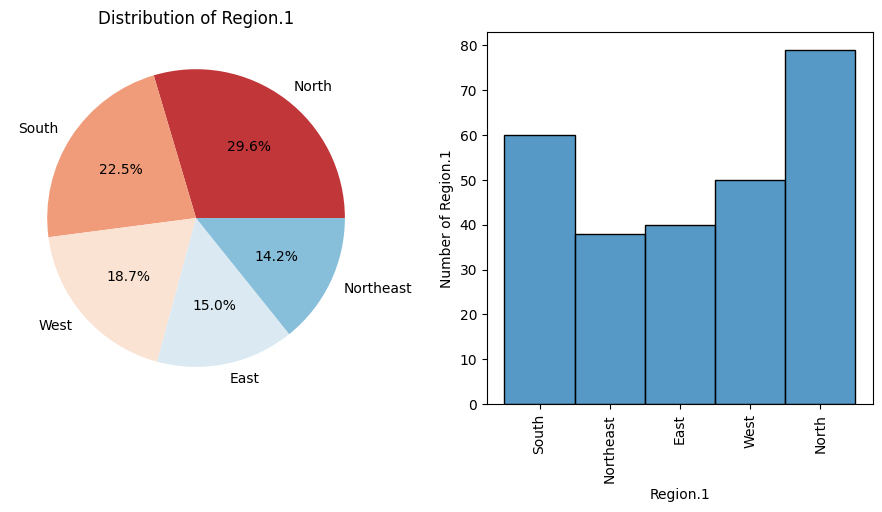

In [16]:
for column in object_data.columns:
    print(data[column].value_counts().reset_index())
    Vsualize(column ,data)

In [17]:
numeric_data =data.select_dtypes(exclude = 'object')

In [18]:
numeric_data

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude,Date
0,5.48,16635535,41.02,15.9129,79.740,2020-01-31
1,5.83,16545652,40.90,15.9129,79.740,2020-02-29
2,5.79,15881197,39.18,15.9129,79.740,2020-03-31
3,20.51,11336911,33.10,15.9129,79.740,2020-04-30
4,17.43,12988845,36.46,15.9129,79.740,2020-05-31
...,...,...,...,...,...,...
262,7.29,30726310,40.39,22.9868,87.855,2020-06-30
263,6.83,35372506,46.17,22.9868,87.855,2020-07-31
264,14.87,33298644,47.48,22.9868,87.855,2020-08-31
265,9.35,35707239,47.73,22.9868,87.855,2020-09-30


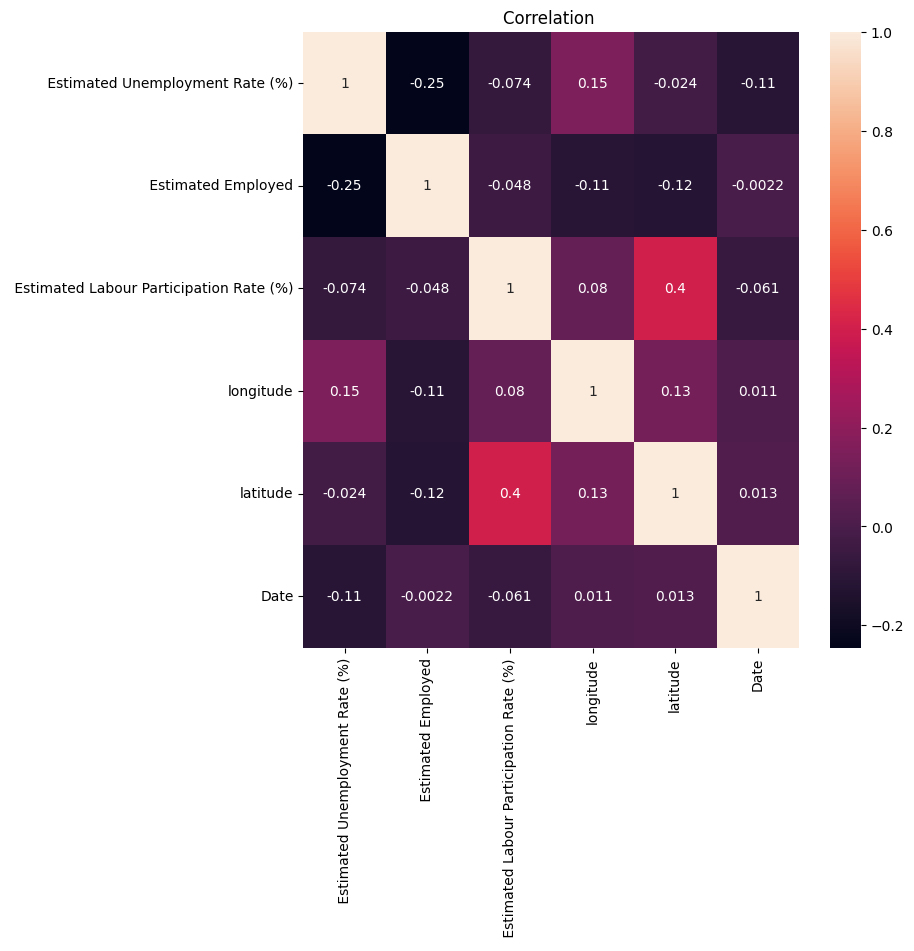

In [19]:
plt.figure(figsize=(8,8))
sns.heatmap(numeric_data.corr(), annot=True)
plt.title("Correlation ")
plt.show()

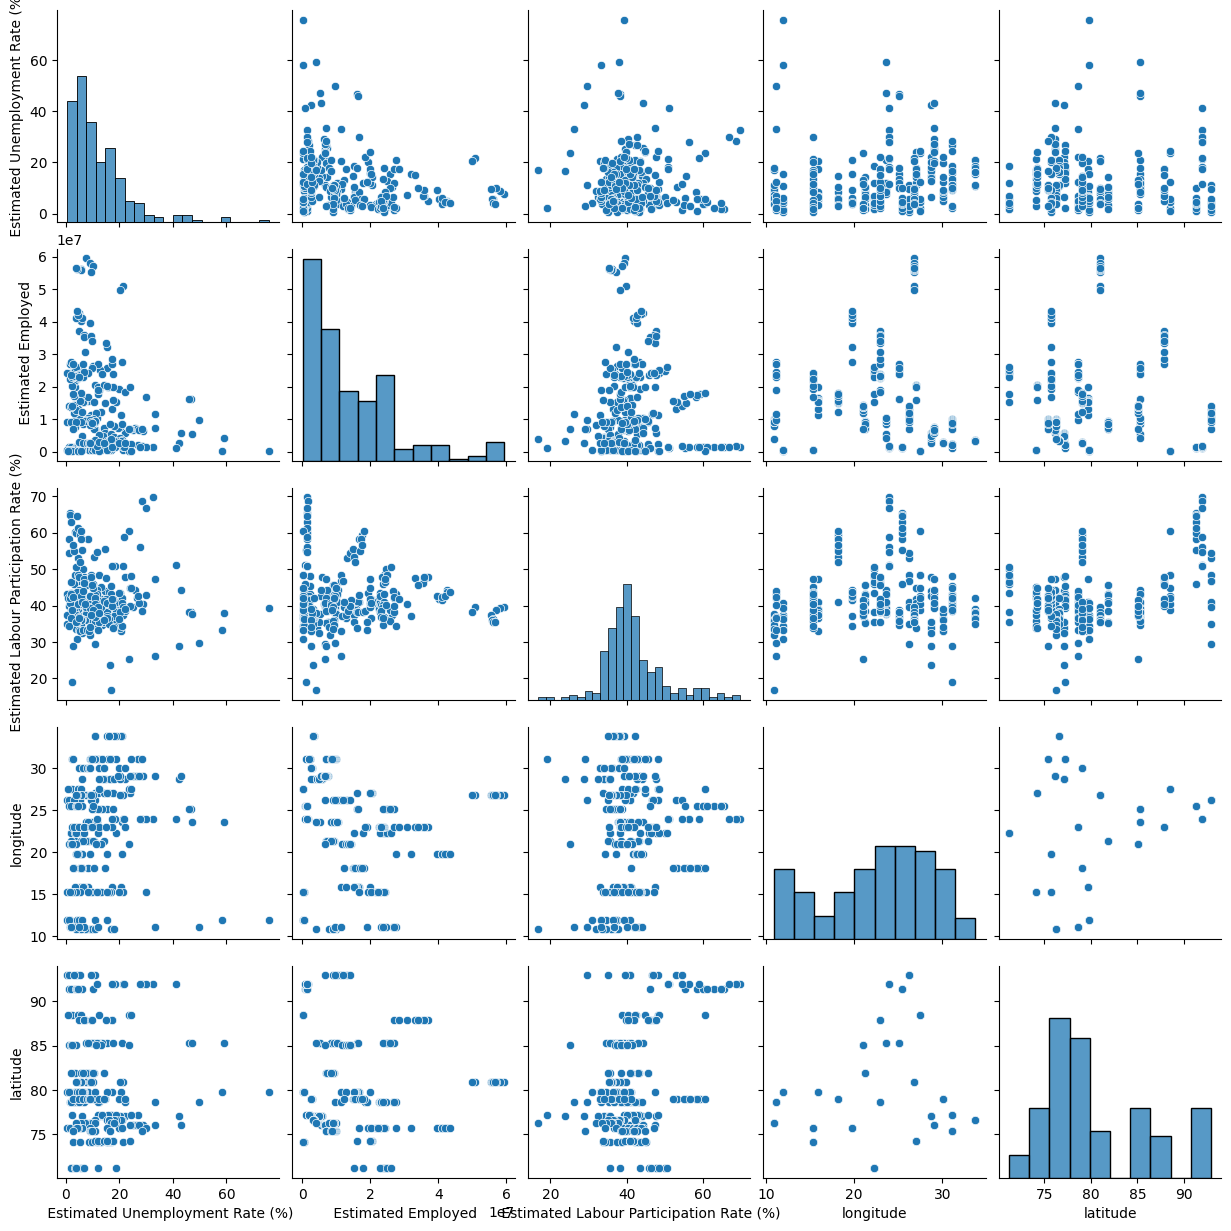

In [20]:
sns.pairplot(data)

In [21]:
data.columns

Index(['Region', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude', 'Date'],
      dtype='object')

In [22]:
data.groupby('Region.1')[[' Frequency', ' Estimated Unemployment Rate (%)','Date']].value_counts().reset_index()

,Region.1,Frequency,Estimated Unemployment Rate (%),Date,count
0,East,M,10.61,2020-01-31,2
1,East,M,1.42,2020-08-31,1
2,East,M,1.88,2020-07-31,1
3,East,M,1.90,2020-01-31,1
4,East,M,2.10,2020-09-30,1
...,...,...,...,...,...
261,West,M,17.07,2020-07-31,1
262,West,M,18.71,2020-04-30,1
263,West,M,20.90,2020-04-30,1
264,West,M,21.25,2020-05-31,1
